Author: Nik Alleyne  
Author Blog: https://www.securitynik.com  
Author GitHub: github.com/securitynik  

Author Books: [

            "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",   
            "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" 
        ] 
 
### SEC595: Applied Data Science and AI/Machine Learning for Cybersecurity Professionals

In [1]:
# Import some initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get the data from the connection log
#df_conn = pd.read_csv(filepath_or_buffer=r'd:/ml/conn-log-data.csv')
df_conn = pd.read_json('d:/ML/conn-known-periodic.json')
df_conn

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,service
0,1.696018e+09,ChefyE3DEW1aClvrpg,127.0.0.1,6789,127.0.0.1,59106,tcp,OTH,True,True,0,Ccc,0,0,0,0,NaN,NaN,NaN,NaN
1,1.696018e+09,CNVult2fJM0kSCwz44,192.168.0.4,9200,192.168.0.4,59876,tcp,OTH,True,True,0,CccC,0,0,0,0,NaN,NaN,NaN,NaN
2,1.696018e+09,CyrAyq3MxIBtwI3l14,192.168.0.4,9200,192.168.0.4,59896,tcp,OTH,True,True,0,CccC,0,0,0,0,NaN,NaN,NaN,NaN
3,1.696018e+09,CTFYJf1YlOlgiuIRq3,192.168.0.29,54167,192.168.0.4,80,tcp,REJ,True,True,0,Sr,1,52,1,40,0.000014,0.0,0.0,NaN
4,1.696018e+09,CFvCzJ3IqyN9ZPo6Yf,192.168.0.29,54169,192.168.0.4,80,tcp,REJ,True,True,0,Sr,1,52,1,40,0.000008,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,1.696021e+09,CIl57F26rutvpFNIkj,127.0.0.1,51801,127.0.0.53,53,udp,OTH,True,True,0,Cc,0,0,0,0,NaN,NaN,NaN,NaN
24044,1.696021e+09,CYZURu44diCxwh9pxi,127.0.0.1,43337,127.0.0.53,53,udp,OTH,True,True,0,Cc,0,0,0,0,NaN,NaN,NaN,NaN
24045,1.696021e+09,CflDF02IWKbWhHkwi4,192.168.0.9,37441,192.168.0.2,53,udp,SF,True,True,0,Dd,1,72,1,210,0.011797,44.0,182.0,dns
24046,1.696021e+09,CV2UuU2rKe8GE34T44,192.168.0.4,48742,64.71.255.202,53,udp,SF,True,False,0,CDd,1,75,1,139,0.049475,47.0,111.0,dns


In [3]:
# Drop the columns which are not of interest to the problem
df_conn.drop(columns=['ts', 'uid', 'proto', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history', 'service'], inplace=True)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
0,127.0.0.1,6789,127.0.0.1,59106,0,0,0,0,NaN,NaN,NaN
1,192.168.0.4,9200,192.168.0.4,59876,0,0,0,0,NaN,NaN,NaN
2,192.168.0.4,9200,192.168.0.4,59896,0,0,0,0,NaN,NaN,NaN
3,192.168.0.29,54167,192.168.0.4,80,1,52,1,40,0.000014,0.0,0.0
4,192.168.0.29,54169,192.168.0.4,80,1,52,1,40,0.000008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24043,127.0.0.1,51801,127.0.0.53,53,0,0,0,0,NaN,NaN,NaN
24044,127.0.0.1,43337,127.0.0.53,53,0,0,0,0,NaN,NaN,NaN
24045,192.168.0.9,37441,192.168.0.2,53,1,72,1,210,0.011797,44.0,182.0
24046,192.168.0.4,48742,64.71.255.202,53,1,75,1,139,0.049475,47.0,111.0


In [4]:
# Above shows some Not A Number (NaN) Values
# Take a look at the data to see if there are any nan values
df_conn.isna().sum()

id.orig_h            0
id.orig_p            0
id.resp_h            0
id.resp_p            0
orig_pkts            0
orig_ip_bytes        0
resp_pkts            0
resp_ip_bytes        0
duration         13868
orig_bytes       13868
resp_bytes       13868
dtype: int64

In [86]:
# Percentage of entries with NAN
# This would be throwing away more than half of our dataset
13868 / df_conn.shape[0]

0.5766799733865602

In [97]:
# Let's instead get the mode to impute our dataset
#df_conn[['duration', 'orig_bytes', 'resp_bytes']].mean()
df_conn[['duration', 'orig_bytes', 'resp_bytes']].mode(axis=0, dropna=True, numeric_only=True)

,duration,orig_bytes,resp_bytes
0,0.00000,0.00000,0.00000


In [5]:
# While I can rop those Not a number - NAN values, I will instead fill them with the 
df_conn.fillna(value=0, inplace=True)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
0,127.0.0.1,6789,127.0.0.1,59106,0,0,0,0,0.000000,0.0,0.0
1,192.168.0.4,9200,192.168.0.4,59876,0,0,0,0,0.000000,0.0,0.0
2,192.168.0.4,9200,192.168.0.4,59896,0,0,0,0,0.000000,0.0,0.0
3,192.168.0.29,54167,192.168.0.4,80,1,52,1,40,0.000014,0.0,0.0
4,192.168.0.29,54169,192.168.0.4,80,1,52,1,40,0.000008,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24043,127.0.0.1,51801,127.0.0.53,53,0,0,0,0,0.000000,0.0,0.0
24044,127.0.0.1,43337,127.0.0.53,53,0,0,0,0,0.000000,0.0,0.0
24045,192.168.0.9,37441,192.168.0.2,53,1,72,1,210,0.011797,44.0,182.0
24046,192.168.0.4,48742,64.71.255.202,53,1,75,1,139,0.049475,47.0,111.0


In [6]:
# The id.orig_p is going to be random, no need to use these
# Finding the number of different id.resp_p
# Taking a look at the resp_p as these are supposed to eh the server side of the communication
# No I do expect to see port 80, 53, 443, etc. 
# However, why these high number ports?
df_conn['id.resp_p'].unique()

array([59106, 59876, 59896,    80,   443, 41272,  6379, 27762,  9200,
          53,  2055, 49820, 49822, 49830, 49840, 49852,  5601,  5353,
        8443, 60282,  6791,  7788, 55408, 27761,   134,  6789, 56192,
         547,   500,  8221, 34202, 39404,   137, 55432, 55392,  3478,
       50806,    10,  3479, 38260, 38286, 55442, 55396, 55430, 55440,
       55416, 55448,   123, 57320, 57336, 57344,  8801,  1900, 10229,
       51924, 51926, 51936, 51948, 51960, 12879,  7989, 44536, 51156,
           1, 44430,     3,   514, 38294, 38284, 35572, 37462, 37474,
       37482, 40196, 40212, 40226, 40240, 40250, 37488, 37492, 51148,
       46952, 46960, 46974, 46988, 47002, 50180, 50182, 51318,   853,
          67, 54022, 52234, 53178, 53194, 53208, 53220, 53228, 46570,
       35580, 32808, 50018, 50030, 50040, 50042, 50056, 38274,  5355,
        8220, 56488,    22,   389, 45656, 45658, 45664, 45678, 45684,
       54430,   136,   135, 54634, 47466,  3702, 39662, 39678, 39688,
       39694, 39702,

In [7]:
# Get the fields we will use when building our models
# Take all rows from column 3 onwards
# Don't want the source IP, source port, or destination IP for this training
# However, we will retain the original dataset
df_conn_train = df_conn.iloc[:, 3:]
df_conn_train

,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
0,59106,0,0,0,0,0.000000,0.0,0.0
1,59876,0,0,0,0,0.000000,0.0,0.0
2,59896,0,0,0,0,0.000000,0.0,0.0
3,80,1,52,1,40,0.000014,0.0,0.0
4,80,1,52,1,40,0.000008,0.0,0.0
...,...,...,...,...,...,...,...,...
24043,53,0,0,0,0,0.000000,0.0,0.0
24044,53,0,0,0,0,0.000000,0.0,0.0
24045,53,1,72,1,210,0.011797,44.0,182.0
24046,53,1,75,1,139,0.049475,47.0,111.0


In [8]:
# Describe the data
pd.options.display.float_format = '{:.5f}'.format
df_conn_train.describe()

,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
count,24048.00000,24048.00000,24048.00000,24048.00000,24048.00000,24048.00000,24048.00000,24048.00000
mean,8453.76356,30.57872,52559.47567,58.96935,106486.88165,34.32276,37305.15099,94154.45858
std,13554.57327,1516.86926,1425437.54432,5560.47517,8331311.51940,989.46869,1271030.99500,8006379.82291
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,80.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,5601.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,8221.00000,1.00000,72.00000,1.00000,80.00000,0.00022,37.00000,48.00000
max,60990.00000,147309.00000,179434842.00000,836146.00000,1253112745.00000,115607.98463,174035086.00000,1207605466.00000


In [9]:
# Import the scaler because we will be using distanced based mechanism
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Setup the scaler and scale the entire data
# This is primarily for visualization
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X=df_conn_train.values)
scaled_X = scaler.transform(X=df_conn_train.values)
scaled_X, scaled_X.shape

(array([[9.69109690e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.81734711e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.82062633e-01, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [8.68994917e-04, 6.78845149e-06, 4.01259862e-07, ...,
         1.02042703e-07, 2.52822583e-07, 1.50711474e-07],
        [8.68994917e-04, 6.78845149e-06, 4.17979023e-07, ...,
         4.27956539e-07, 2.70060487e-07, 9.19174375e-08],
        [8.68994917e-04, 6.78845149e-06, 4.17979023e-07, ...,
         1.22690471e-07, 2.70060487e-07, 1.05994883e-07]]),
 (24048, 8))

In [11]:
# Import PCA
from sklearn.decomposition import PCA

In [12]:
# Reduce the dataset to 2 dimensions so we can plot in 2D
pca = PCA(n_components=2)
pca_X = pca.fit_transform(scaled_X)
pca_X, pca_X.shape

(array([[ 8.30496597e-01, -1.46369114e-03],
        [ 8.43121570e-01, -1.47936443e-03],
        [ 8.43449491e-01, -1.47977153e-03],
        ...,
        [-1.37740462e-01, -2.56496989e-04],
        [-1.37740462e-01, -2.56460033e-04],
        [-1.37740462e-01, -2.56511634e-04]]),
 (24048, 2))

In [13]:
# PCA Eigen Vectors
#pca.components_

In [99]:
# How much of these 8 features is now represented by these two dimensions
np.cumsum(pca.explained_variance_ratio_)

array([0.99141418, 0.99612175])

Text(0, 0.5, 'X1 ')

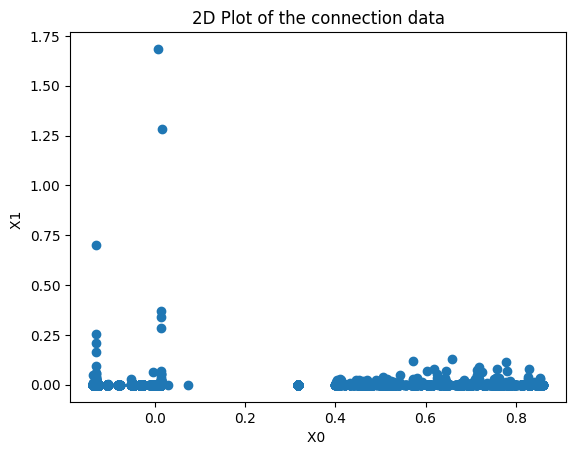

In [100]:
# Use dimensionality reduction to visualize the dataset
# From a 2D perspective, we see there are anomalies/outliers here
plt.title('2D Plot of the connection data')
plt.scatter(x=pca_X[:, 0], y=pca_X[:, 1])
plt.xlabel(xlabel='X0 ')
plt.ylabel(ylabel='X1 ')

- Introducing Nearest Neighbors here to identify outliers
- This is not specific to classification or regression
- Nearest neighbors algorithm supports many supervised and unsupervised learning algorithms
- 

In [16]:
# Get the distance of the points
from sklearn.neighbors import NearestNeighbors

In [17]:
# Instantiate the neighbors class
# This concept of nearest neighbors, is the foundation of many machine learning models.
# Both supervised and unsupervised
neighbors = NearestNeighbors(n_neighbors=15, algorithm='auto').fit(pca_X)
neighbors

NearestNeighbors(n_neighbors=15)

In [18]:
np.set_printoptions(suppress=True)
# Get the distances and their indices
distances, indices = neighbors.kneighbors(pca_X)

# Get the distances and indices of the first 5 samples
indices[20:25], distances[20:25], 

(array([[   20,  1073,    51, 12756, 10004,  1404,  8550, 15568,  1589,
          2239,  4556, 15935,  4242,  6800,    67],
        [   21,    18, 14612, 10843,  3414,  6965,  8606, 20984, 21264,
          3026, 17253,  7120,  7071, 20884,  6807],
        [   22,    13,  5702,  1392, 15013,  8559,  3769, 21891,  6743,
            41,  2138, 10652, 14635, 11923,  7328],
        [   23, 15570,  3075, 23368,  8297, 21925, 17303,  7216,  6807,
          7071,  6942,  7120, 14612,    21,    18],
        [   24,    61, 17648,  8625,   658,  8006,  9751, 10848,  9105,
         19772, 23805,  9075, 21615, 18750, 18343]], dtype=int64),
 array([[0.        , 0.00000006, 0.00000014, 0.00000034, 0.00000049,
         0.00000063, 0.00000074, 0.00000088, 0.00000101, 0.00000123,
         0.00000126, 0.00000131, 0.00000138, 0.00000156, 0.00000179],
        [0.        , 0.        , 0.00000036, 0.00000069, 0.00000088,
         0.00000114, 0.00000116, 0.00000152, 0.00000166, 0.00000173,
         0.00000183

In [19]:
# Let's see what makes 1073 similar to 20 and 18343 dissimilar to 20
df_conn.iloc[[20, 1073, 18343]]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
20,192.168.0.29,53935,172.217.1.10,443,16,1859,20,12309,36.33165,1207.00000,11497.00000
1073,192.168.0.29,54272,142.251.32.67,443,8,1174,6,1598,64.60632,841.00000,1334.00000
18343,192.168.0.95,55326,142.251.41.42,443,12,1537,11,2304,245.21651,869.00000,1505.00000


In [20]:
# Find the largest distance value
# This point is more than likely in a dense area
distances.min(), distances.max()

(0.0, 1.6314021057249442)

In [21]:
# Get the mean of the distances
distances_mean = distances.mean(axis=-1)

# Get the mean of the mean
distances_mean, np.mean(distances_mean), np.std(distances_mean)

(array([0.        , 0.00130294, 0.00101874, ..., 0.        , 0.        ,
        0.        ]),
 0.0003142376254150516,
 0.011508638171353334)

In [22]:
# Mean + 3 standard deviations above the mean
# 65 1 > 95 2 -> 99.7 3 standard deviations
mean_3_std = np.mean(distances_mean) + 3 * np.std(distances_mean)
mean_3_std

0.034840152139475056

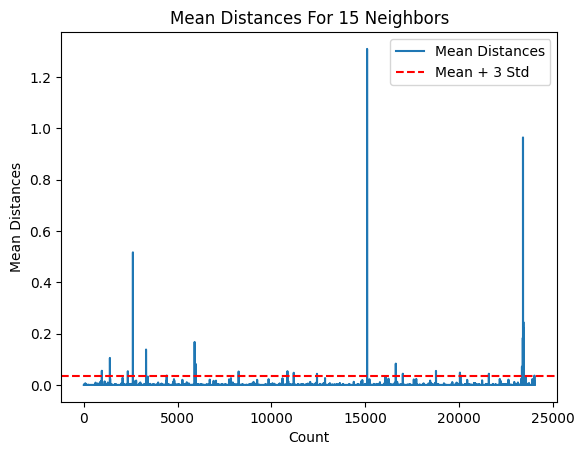

In [23]:
# Below shows some samples have an extremely high mean when compared to others
# We can set a baseline here and use that to identify anomalous samples
plt.title(label='Mean Distances For 15 Neighbors')
plt.plot(distances.mean(axis=-1), label='Mean Distances')
plt.xlabel(xlabel='Count')
plt.ylabel(ylabel='Mean Distances')
plt.axhline(y=mean_3_std, color='r', ls='--', label='Mean + 3 Std')
plt.legend()

In [24]:
# Find those samples above our threshold
outliers_index = np.where(distances_mean > mean_3_std)
outliers_index

(array([  961,  1391,  2347,  2618,  3318,  4420,  5909,  5968,  8256,
        10859, 11195, 12435, 15106, 16637, 17012, 18781, 20058, 20083,
        21601, 23366, 23412, 23421, 23441, 23447, 24030], dtype=int64),)

In [25]:
# Grab those outliers based on the indexes
outlier_values = df_conn.iloc[outliers_index]
outlier_values

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
961,192.168.0.29,14559,192.168.1.160,12879,154,17402,0,0,7.49870,13090.00000,0.00000
1391,192.168.0.31,51760,165.225.208.44,443,17442,8006593,15058,1295176,29656.26558,7308515.00000,692511.00000
2347,192.168.0.29,54162,149.137.17.85,443,11165,11042145,7933,496272,288.44904,10594085.00000,178804.00000
2618,192.168.0.95,42906,35.241.16.93,443,101623,5545672,198999,282826980,3600.56226,238732.00000,272326569.00000
3318,192.168.0.31,49545,52.226.139.180,443,1940,179947,993,214632,115607.98463,102335.00000,173088.00000
4420,192.168.0.4,9200,192.168.0.4,46590,712,16650374,260,4730652,695.97177,9315244.00000,4050431.00000
5909,192.168.0.28,50051,194.24.0.155,443,34178,9027403,46280,15126779,28258.32542,7659535.00000,13275555.00000
5968,192.168.0.4,9200,192.168.0.4,48590,1814,39315754,704,12627032,1998.34650,22341597.00000,10672901.00000
8256,192.168.0.4,9200,192.168.0.4,46180,1020,20300110,3096,50499636,380.43826,10128554.00000,27476669.00000
10859,192.168.0.4,9200,192.168.0.4,52214,1274,28454496,448,7766818,1325.99839,16060251.00000,6837373.00000


In [26]:
# Get the shape of those outlier values
outlier_values.shape

(25, 11)

In [27]:
# Get the data from the PCA,
# Remember though, we have to go back to the original data
#np.set_printoptions(suppress=True)
#pca_X[20], pca_X[1073], pca_X[18343]

In [28]:
# Take a look at index 0 and index 490 to see what is similar about them
# df_conn.iloc[20].values, df_conn.iloc[1073].values, df_conn.iloc[18343].values

In [29]:
# Bring in the local Outlier Factor
from sklearn.neighbors import LocalOutlierFactor

In [30]:
# Run the local outlier factor against the PCA data.
# Assume we have no idea on the number of points considered anomalies
# We let the algorithm decide
lof =  LocalOutlierFactor(n_neighbors=20, contamination='auto')
lof_labels = lof.fit_predict(pca_X)
lof_labels

array([1, 1, 1, ..., 1, 1, 1])

In [31]:
# Get the unique labels
# These labels can now be used for supervised learning if we wish
# Keep in mind, many tools make decisions on anomalies as binary.
# We will not be using these labels but will have them here if someone else wanted to
lof_labels_unique = np.unique(ar=lof_labels, return_counts=True)
lof_labels_unique

(array([-1,  1]), array([  977, 23071], dtype=int64))

In [32]:
# Get the proportion of the samples based on the labels
# Now that the algorithm has flagged points as anomalous or not (binary)
np.round(lof_labels_unique[1]/len(lof_labels),4 )*100

array([ 4.06, 95.94])

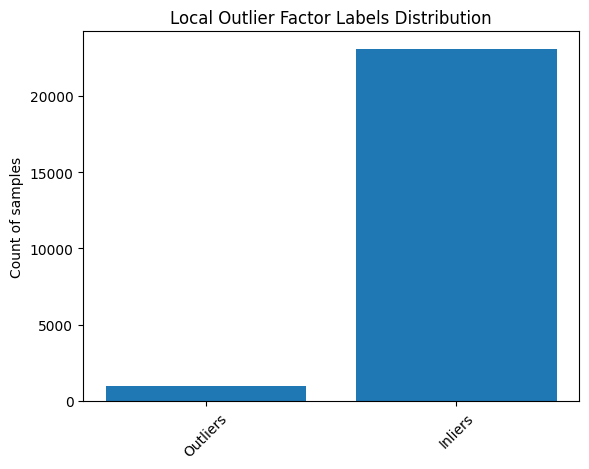

In [33]:
# Visualize the classes/labels
plt.title(label='Local Outlier Factor Labels Distribution')
plt.bar(range(2), lof_labels_unique[1])
plt.xticks(ticks=[0, 1], labels=['Outliers', 'Inliers'], rotation=45);
plt.ylabel('Count of samples');

In [34]:
# Add the scores to the dataset.
# This can be used for supervised learning if we wish
df_conn['lof_labels'] = lof_labels.reshape(-1,1 )
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,lof_labels
0,127.0.0.1,6789,127.0.0.1,59106,0,0,0,0,0.00000,0.00000,0.00000,1
1,192.168.0.4,9200,192.168.0.4,59876,0,0,0,0,0.00000,0.00000,0.00000,1
2,192.168.0.4,9200,192.168.0.4,59896,0,0,0,0,0.00000,0.00000,0.00000,1
3,192.168.0.29,54167,192.168.0.4,80,1,52,1,40,0.00001,0.00000,0.00000,1
4,192.168.0.29,54169,192.168.0.4,80,1,52,1,40,0.00001,0.00000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24043,127.0.0.1,51801,127.0.0.53,53,0,0,0,0,0.00000,0.00000,0.00000,1
24044,127.0.0.1,43337,127.0.0.53,53,0,0,0,0,0.00000,0.00000,0.00000,1
24045,192.168.0.9,37441,192.168.0.2,53,1,72,1,210,0.01180,44.00000,182.00000,1
24046,192.168.0.4,48742,64.71.255.202,53,1,75,1,139,0.04948,47.00000,111.00000,1


In [35]:
# Get the anomaly scores
# These are what we will use to determine the degree of outlier-ness
lof_scores = lof.negative_outlier_factor_
lof_scores

array([-1.00002359, -1.12360473, -1.07238358, ..., -0.98785423,
       -1.0320386 , -1.00394503])

In [36]:
# Add the local outlier scores as a column
df_conn['lof_scores'] = lof_scores.reshape(-1,1 )
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,lof_labels,lof_scores
0,127.0.0.1,6789,127.0.0.1,59106,0,0,0,0,0.00000,0.00000,0.00000,1,-1.00002
1,192.168.0.4,9200,192.168.0.4,59876,0,0,0,0,0.00000,0.00000,0.00000,1,-1.12360
2,192.168.0.4,9200,192.168.0.4,59896,0,0,0,0,0.00000,0.00000,0.00000,1,-1.07238
3,192.168.0.29,54167,192.168.0.4,80,1,52,1,40,0.00001,0.00000,0.00000,1,-1.00009
4,192.168.0.29,54169,192.168.0.4,80,1,52,1,40,0.00001,0.00000,0.00000,1,-0.99949
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24043,127.0.0.1,51801,127.0.0.53,53,0,0,0,0,0.00000,0.00000,0.00000,1,-1.00000
24044,127.0.0.1,43337,127.0.0.53,53,0,0,0,0,0.00000,0.00000,0.00000,1,-1.00000
24045,192.168.0.9,37441,192.168.0.2,53,1,72,1,210,0.01180,44.00000,182.00000,1,-0.98785
24046,192.168.0.4,48742,64.71.255.202,53,1,75,1,139,0.04948,47.00000,111.00000,1,-1.03204


In [37]:
# Now if we want, we can use these labels as the mechanism to do supervised learning via classification
# We can even use these labels as the basis to extract our anomalies.
df_conn[df_conn.lof_labels == -1]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,lof_labels,lof_scores
45,192.168.0.29,53797,172.217.1.14,443,2085,2675871,1501,109534,74.45655,2592459.00000,49482.00000,-1,-1.53384
50,192.168.0.29,53798,142.251.41.37,443,1064,275532,3294,3801827,74.45650,232840.00000,3633343.00000,-1,-1.55181
54,192.168.0.29,53955,172.64.155.119,443,12,1618,12,3541,33.38030,1126.00000,3049.00000,-1,-6.75838
109,192.168.0.29,54133,65.39.152.130,443,6,1292,8,5440,0.22864,1040.00000,5108.00000,-1,-5.61416
110,192.168.0.29,54136,65.39.152.28,443,6,1292,8,5440,0.22898,1040.00000,5108.00000,-1,-5.61384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23925,192.168.0.4,9200,192.168.0.4,51758,450,9148872,146,2570254,485.99691,5189751.00000,2263001.00000,-1,-2.98940
23937,192.168.0.28,61785,192.168.0.2,53,2,158,2,375,1.62093,102.00000,319.00000,-1,-2.65387
24016,192.168.0.4,9200,192.168.0.4,38706,264,6445490,100,1753052,315.21136,3608526.00000,1519692.00000,-1,-5.18107
24029,192.168.0.4,9200,192.168.0.4,54932,446,10952368,160,2879084,443.99903,6059201.00000,2460817.00000,-1,-219.15216


In [38]:
# Before making a decision on the way forward, let's look at the statistics of the scores
# Get the statistics for the scores
df_conn.lof_scores.describe()

count        24048.00000
mean        -65407.07105
std        1692475.04112
min     -118961440.71664
25%             -1.00000
50%             -1.00000
75%             -1.00000
max             -0.89148
Name: lof_scores, dtype: float64

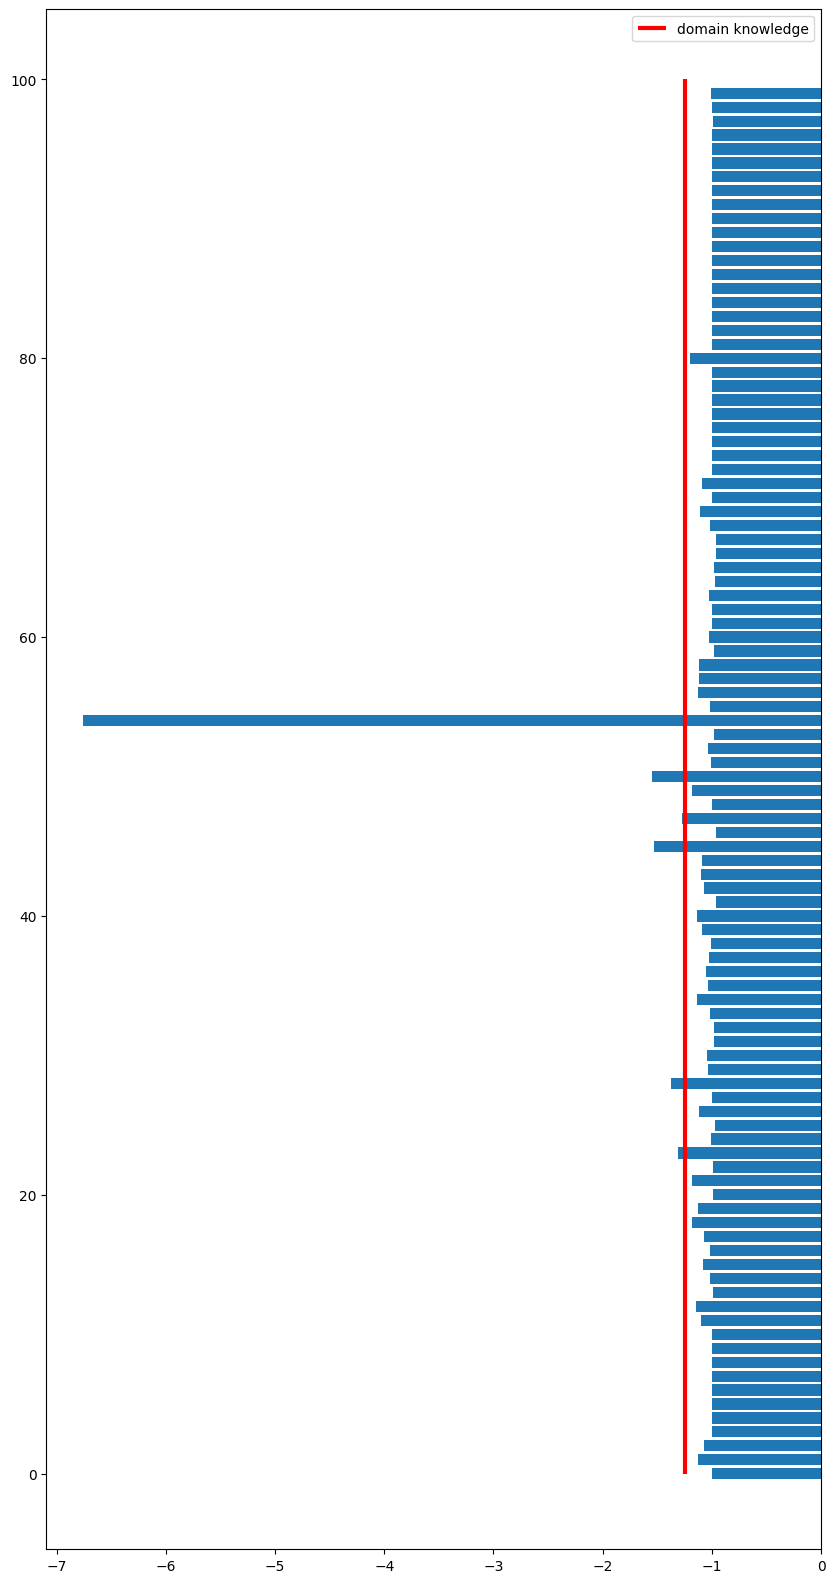

In [39]:
# Plot the outlier factors scores
plt.figure(figsize=(10,20))
plt.barh(range(len(df_conn.lof_scores[:100])), df_conn.lof_scores.values[:100])

# Mean is so far out, we cannot even see it relevant to the data
#plt.vlines(x=df_conn.lof_scores.mean(), ymin=0, ymax=100, label='mean', color='black', lw=3)

# Maybe we use our domain knowledge. Comment out above when doing this one
plt.vlines(x=-1.25, ymin=0, ymax=100, label='domain knowledge', colors='red', lw=3)
plt.legend()

Text(0, 0.5, 'Number of items in bins')

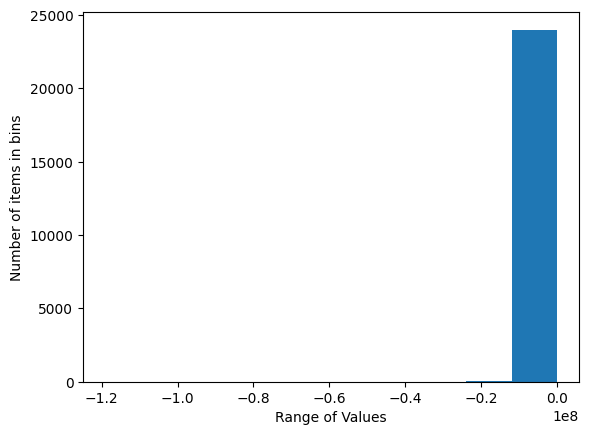

In [40]:
# Looking at the data from a histogram perspective
plt.hist(df_conn.lof_scores, bins=10)
plt.xlabel('Range of Values')
plt.ylabel('Number of items in bins')

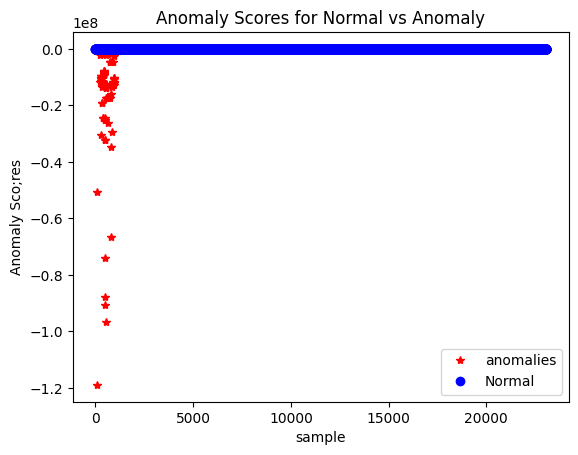

In [41]:
# Take another view, this time look at the anomaly scores
# Looking at the scores for the normal points vs the anomaly points
plt.title('Anomaly Scores for Normal vs Anomaly')
plt.plot(df_conn[df_conn.lof_labels == -1]['lof_scores'].values, ls='', marker='*', c='r', label=f'anomalies')
plt.plot(df_conn[df_conn.lof_labels == 1]['lof_scores'].values, ls='', marker='o', c='b', label='Normal')
plt.xlabel(xlabel='sample')
plt.ylabel(ylabel='Anomaly Sco;res');
plt.legend()

In [42]:
# If you are wondering why the anomaly scores are on the left is because there are 768 samples
df_conn[df_conn.lof_labels == -1]['lof_scores'].values.shape

(977,)

In [43]:
# And the number of samples flagged with labels = 1 is almost 7000
df_conn[df_conn.lof_labels == 1]['lof_scores'].values.shape

(23071,)

In [44]:
# Set a domain knowledge threshold
#thresh = df_conn.lof_scores.mean()
thresh = -1.5
thresh

-1.5

In [45]:
# For the purpose of this discussion, let's use the mean as our threshold 
df_conn[df_conn.lof_scores < thresh ]

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes,lof_labels,lof_scores
45,192.168.0.29,53797,172.217.1.14,443,2085,2675871,1501,109534,74.45655,2592459.00000,49482.00000,-1,-1.53384
50,192.168.0.29,53798,142.251.41.37,443,1064,275532,3294,3801827,74.45650,232840.00000,3633343.00000,-1,-1.55181
54,192.168.0.29,53955,172.64.155.119,443,12,1618,12,3541,33.38030,1126.00000,3049.00000,-1,-6.75838
109,192.168.0.29,54133,65.39.152.130,443,6,1292,8,5440,0.22864,1040.00000,5108.00000,-1,-5.61416
110,192.168.0.29,54136,65.39.152.28,443,6,1292,8,5440,0.22898,1040.00000,5108.00000,-1,-5.61384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23925,192.168.0.4,9200,192.168.0.4,51758,450,9148872,146,2570254,485.99691,5189751.00000,2263001.00000,-1,-2.98940
23937,192.168.0.28,61785,192.168.0.2,53,2,158,2,375,1.62093,102.00000,319.00000,-1,-2.65387
24016,192.168.0.4,9200,192.168.0.4,38706,264,6445490,100,1753052,315.21136,3608526.00000,1519692.00000,-1,-5.18107
24029,192.168.0.4,9200,192.168.0.4,54932,446,10952368,160,2879084,443.99903,6059201.00000,2460817.00000,-1,-219.15216


In [46]:
# Write the records above out to a dataset we will call anomalies
df_anomalies = df_conn[df_conn.lof_scores < thresh].drop(columns=['id.orig_h', 'id.orig_p',	'id.resp_h', 'lof_labels', 'lof_scores'], inplace=False)
df_anomalies

,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
45,443,2085,2675871,1501,109534,74.45655,2592459.00000,49482.00000
50,443,1064,275532,3294,3801827,74.45650,232840.00000,3633343.00000
54,443,12,1618,12,3541,33.38030,1126.00000,3049.00000
109,443,6,1292,8,5440,0.22864,1040.00000,5108.00000
110,443,6,1292,8,5440,0.22898,1040.00000,5108.00000
...,...,...,...,...,...,...,...,...
23925,51758,450,9148872,146,2570254,485.99691,5189751.00000,2263001.00000
23937,53,2,158,2,375,1.62093,102.00000,319.00000
24016,38706,264,6445490,100,1753052,315.21136,3608526.00000,1519692.00000
24029,54932,446,10952368,160,2879084,443.99903,6059201.00000,2460817.00000


In [47]:
# Write the records above out to a dataset we will call anomalies
df_normal =df_conn[df_conn.lof_scores >= thresh].drop(columns=['id.orig_h', 'id.orig_p',	'id.resp_h', 'lof_labels', 'lof_scores'], inplace=False)
df_normal

,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,duration,orig_bytes,resp_bytes
0,59106,0,0,0,0,0.00000,0.00000,0.00000
1,59876,0,0,0,0,0.00000,0.00000,0.00000
2,59896,0,0,0,0,0.00000,0.00000,0.00000
3,80,1,52,1,40,0.00001,0.00000,0.00000
4,80,1,52,1,40,0.00001,0.00000,0.00000
...,...,...,...,...,...,...,...,...
24043,53,0,0,0,0,0.00000,0.00000,0.00000
24044,53,0,0,0,0,0.00000,0.00000,0.00000
24045,53,1,72,1,210,0.01180,44.00000,182.00000
24046,53,1,75,1,139,0.04948,47.00000,111.00000


In [48]:
# Setup a scaler and train it for the normal values
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df_normal.values)
scaled_normal = scaler.transform(df_normal.values)
scaled_normal, scaled_normal.shape

(array([[0.96910969, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98173471, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.98206263, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00086899, 0.00068259, 0.00002466, ..., 0.00000325, 0.00002717,
         0.00001644],
        [0.00086899, 0.00068259, 0.00002569, ..., 0.00001363, 0.00002903,
         0.00001003],
        [0.00086899, 0.00068259, 0.00002569, ..., 0.00000391, 0.00002903,
         0.00001157]]),
 (23071, 8))

In [49]:
# Use the scaler to tranform the anomalies
scaled_anomalies = scaler.transform(df_anomalies.values)
scaled_anomalies, scaled_anomalies.shape

(array([[0.00726349, 1.42320819, 0.91641552, ..., 0.02051675, 1.60101565,
         0.00447091],
        [0.00726349, 0.72627986, 0.09436247, ..., 0.02051673, 0.14379417,
         0.32828816],
        [0.00726349, 0.00819113, 0.00055412, ..., 0.00919805, 0.00069538,
         0.00027549],
        ...,
        [0.63462863, 0.18020478, 2.20741099, ..., 0.08685752, 2.22850452,
         0.13731071],
        [0.90067224, 0.30443686, 3.75089831, ..., 0.12234538, 3.74195913,
         0.2223454 ],
        [0.86394491, 0.64846416, 6.7368288 , ..., 0.26204536, 6.93950319,
         0.50223311]]),
 (977, 8))

In [50]:
# When you deploy your model, to make predictions your data will have to be on the same scale
# Let's save the scaler
import joblib

In [51]:
# Save the scaler to disk
joblib.dump(value=scaler, filename='./min_max_scaler_autoencoder.joblib')

# Verify the file has been saved
!dir min_max_scaler_autoencoder.joblib

 Volume in drive D is STUFF
 Volume Serial Number is 604F-8642

 Directory of d:\ML

2024-01-31  06:35 PM               983 min_max_scaler_autoencoder.joblib
               1 File(s)            983 bytes
               0 Dir(s)  296,661,946,368 bytes free


In [52]:
# Load the scaler in the future if you wish
# This allows you to transform your future data
min_max_scaler = joblib.load(filename=r'./min_max_scaler_autoencoder.joblib')
min_max_scaler

MinMaxScaler()

In [53]:
# Import Tensorfllow library
import tensorflow as tf

In [54]:
# There are different approaches to building a model, let's 
#   Sequential Class, Functional API and Model Subclassing
# The one you are likely to use the most is sequential class. The one the least is subclassing.
# Let's take the route least traveled 

# Setup the class
class AnomalyDetection(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetection, self).__init__()

        # Setup the encoder
        self.encoder = tf.keras.Sequential(layers=[
            tf.keras.layers.Input(shape=(scaled_normal.shape[1],), name='Input_layer'),
            tf.keras.layers.Dense(units=4, activation='relu', name='encoder_hidden', use_bias=True, kernel_initializer='he_normal'),
            tf.keras.layers.Dense(units=2, activation='relu', name='latent_space_bottleneck', use_bias=True, kernel_initializer='he_normal' )
        ], name='Encoder')

        self.decoder = tf.keras.Sequential(layers=[
            tf.keras.layers.Dense(units=4, activation='relu', name='decoder_hidden', use_bias=True, kernel_initializer='he_normal'),
            tf.keras.layers.Dense(units=scaled_normal.shape[1], activation='sigmoid', name='decoder', use_bias=True, kernel_initializer='glorot_normal' )
        ], name='Decoder')
    
    def call(self, x):
        encoded_data = self.encoder(x)
        return self.decoder(encoded_data)
    
    # Add a custom function to plot the graph of the model
    def build_graph(self, input_shape):
        x = tf.keras.Input(shape=input_shape)
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

In [55]:
# Instantiate the class
autoencoder = AnomalyDetection()
autoencoder

In [56]:
# Compile the autoencoder
autoencoder.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mae', metrics=['mae'] )

In [57]:
# Define a callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callback

In [58]:
# Make this repeatable
tf.keras.utils.set_random_seed(seed=10)

# Train the model
history = autoencoder.fit(x=scaled_normal, y=scaled_normal, epochs=100, batch_size=16, validation_split=0.2, shuffle=True, verbose=1, callbacks=[callback])
history

Epoch 1/100
1154/1154 [==============================] - 5s 3ms/step - loss: 0.1372 - mae: 0.1372 - val_loss: 0.0146 - val_mae: 0.0146
Epoch 2/100
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0132 - mae: 0.0132 - val_loss: 0.0116 - val_mae: 0.0116
Epoch 3/100
1154/1154 [==============================] - 4s 3ms/step - loss: 0.0082 - mae: 0.0082 - val_loss: 0.0060 - val_mae: 0.0060
Epoch 4/100
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0054 - mae: 0.0054 - val_loss: 0.0054 - val_mae: 0.0054
Epoch 5/100
1154/1154 [==============================] - 3s 3ms/step - loss: 0.0052 - mae: 0.0052 - val_loss: 0.0051 - val_mae: 0.0051
Epoch 6/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.0051 - mae: 0.0051 - val_loss: 0.0050 - val_mae: 0.0050
Epoch 7/100
1154/1154 [==============================] - 4s 4ms/step - loss: 0.0051 - mae: 0.0051 - val_loss: 0.0051 - val_mae: 0.0051
Epoch 8/100
1154/1154 [==============================] 

In [59]:
# Get the model config
autoencoder.summary(expand_nested=True)

Model: "anomaly_detection"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 2)                 46        
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| encoder_hidden (Dense)    (None, 4)                 36        |
|                                                               |
| latent_space_bottleneck (De  (None, 2)              10        |
| nse)                                                          |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 Decoder (Sequential)        (None, 8)                 52        
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| decoder_hidden (Dense)    (None, 4)                 12        |
|                                                               |
| decoder (Dense)           (None, 8)                 40        |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯

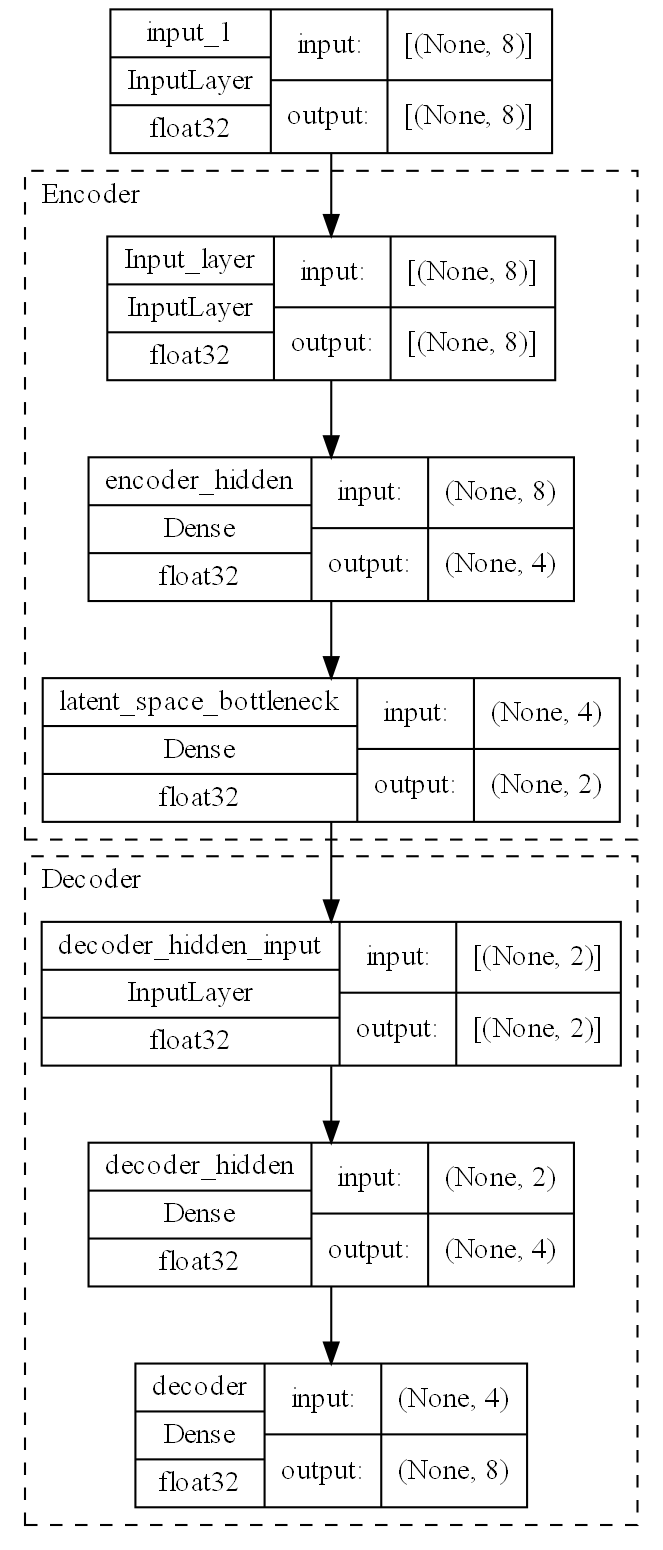

In [60]:
# Plot the model from a different perspective
tf.keras.utils.plot_model(model=autoencoder.build_graph(input_shape=scaled_normal.shape[1]), expand_nested=True, show_dtype=True, show_layer_activations=True, show_layer_names=True, show_shapes=True, dpi=150)

In [61]:
# Get the keys from the history callback
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

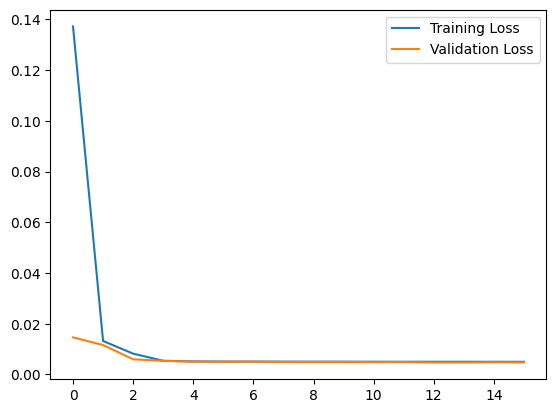

In [62]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [63]:
# Make a prediction on the normal dataset
normal_predict = autoencoder.predict(x=scaled_normal)

# Take off this scientific notation
pd.options.display.float_format = '{:.5f}'.format

# Get the reconstruction loss
normal_err = pd.DataFrame({'normal_err': np.mean(np.abs(scaled_normal - normal_predict), axis=-1)})
normal_err.describe()

721/721 [==============================] - 1s 2ms/step


,normal_err
count,23071.00000
mean,0.00495
std,0.01251
min,0.00001
25%,0.00023
50%,0.00166
75%,0.00394
max,0.55194


In [64]:
# As we are here, let's set an anomaly threshold based on our domain knowledge
# We will say the threshold is 2 standard deviations above the mean
# 65 1 > 95 2 -> 99.7 3 standard deviations
suspicious_threshold = normal_err.mean() + 1 * normal_err.std()
suspicious_threshold.item()

0.01746043965222465

In [65]:
# Make a prediction on the anomalies dataset
# Keep in mind the dataset has been scaled between 0 and 1,
# So we are operating on the scaled values rather than the raw values
anomalies_predict = autoencoder.predict(x=scaled_anomalies)

# Get the reconstruction loss
anomalies_err = pd.DataFrame({'anomalies_err': np.mean(np.abs(scaled_anomalies - anomalies_predict), axis=-1)})
anomalies_err.describe()

31/31 [==============================] - 0s 3ms/step


,anomalies_err
count,977.00000
mean,0.28978
std,2.20974
min,0.00022
25%,0.00343
50%,0.00394
75%,0.02423
max,53.63012


In [66]:
# Revisit a sample of the scaled data
np.set_printoptions(suppress=True)
scaled_anomalies[0], scaled_anomalies[0].mean()

(array([0.00726349, 1.42320819, 0.91641552, 0.18949628, 0.00954065,
        0.02051675, 1.60101565, 0.00447091]),
 0.5214909290191281)

In [67]:
# We can undo the scaled data
# First we expand the dimension
# Then undo the scaling process
np.set_printoptions(suppress=True)
scaler.inverse_transform(np.expand_dims(scaled_anomalies[0], axis=0))

array([[    443.        ,    2085.        , 2675871.        ,
           1501.        ,  109534.        ,      74.45654988,
        2592459.        ,   49482.        ]])

In [68]:
# Confirm this is the same as the original dataframe
df_anomalies.iloc[0], df_anomalies.iloc[0].values.mean(axis=0)

(id.resp_p           443.00000
 orig_pkts          2085.00000
 orig_ip_bytes   2675871.00000
 resp_pkts          1501.00000
 resp_ip_bytes    109534.00000
 duration             74.45655
 orig_bytes      2592459.00000
 resp_bytes        49482.00000
 Name: 45, dtype: float64,
 678931.1820687354)

In [69]:
np.set_printoptions(suppress=True)
# So with that in place, we can now create an alert for when new iitems are seen
# Let's say we have a sample
new_sample = np.array([[443, 100, 1292, 1000, 5440, 30.22898, 10040.00,	59108.]])
new_sample

array([[  443.     ,   100.     ,  1292.     ,  1000.     ,  5440.     ,
           30.22898, 10040.     , 59108.     ]])

In [70]:
# First we need to do, is pass it through our scaler
# The same preprocessing we did on the training data, has to be done on any future data
scaler.transform(new_sample)

array([[0.00726349, 0.06825939, 0.00044248, 0.12624669, 0.00047384,
        0.00832969, 0.00620037, 0.00534066]])

In [71]:
# Now we can go ahead and check if it is suspicious
new_sample_pred = autoencoder.predict(x=scaler.transform(new_sample))
new_sample_pred

1/1 [==============================] - 0s 65ms/step


array([[0.00000863, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]], dtype=float32)

In [72]:
# Calculate the mean absolute error
suspicious_score = np.mean(np.abs(scaler.transform(new_sample) - new_sample_pred), axis=-1)
suspicious_score

array([0.0278185])

In [73]:
from datetime import datetime as dt

In [74]:
# Trigger an alert, when something suspicious is detected
f'{dt.now()} [**] SUSPICIOUS Sample detected' if (suspicious_score > suspicious_threshold).item() else f'{dt.now()} Looks Normal'

'2024-01-31 18:37:07.862224 [**] SUSPICIOUS Sample detected'

In [75]:
# if we wanted to see the model weights
autoencoder.weights

[<tf.Variable 'encoder_hidden/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-1.88585   , -0.02162915, -0.47562748, -1.4468036 ],
        [11.189541  , -0.41393915,  0.5213968 , 10.635281  ],
        [ 4.292812  ,  0.03487923,  0.24683128,  3.3064249 ],
        [ 3.7855337 , -0.7966169 ,  0.7683966 ,  2.923343  ],
        [ 5.8514524 , -0.16885756, -0.7657141 ,  4.7985053 ],
        [ 3.9655392 , -0.26708677, -0.16083845,  2.7358267 ],
        [ 4.197389  , -1.0564606 ,  1.067438  ,  4.0882826 ],
        [ 5.3081856 , -0.36352742, -0.83193064,  3.8651    ]],
       dtype=float32)>,
 <tf.Variable 'encoder_hidden/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.70998055,  0.        , -0.00392538,  0.5288835 ], dtype=float32)>,
 <tf.Variable 'latent_space_bottleneck/kernel:0' shape=(4, 2) dtype=float32, numpy=
 array([[ 2.098426  ,  1.6776534 ],
        [ 0.0364853 ,  0.62742656],
        [-0.85281944, -1.4740705 ],
        [ 1.385764  ,  1.6201996 ]], dtype=float32)>,
 <tf.Variab

In [76]:
import os
from pathlib import Path

In [77]:
# Save the model
MODEL_DIR = './AUTOENCODER_SAVED_MODEL/'
version = 1

export_path = MODEL_DIR + str(version)

# If the path does not exist, create it
if not os.path.exists(path=export_path):
    os.makedirs(name=export_path)

# Actually save the model
tf.keras.models.save_model(model=autoencoder, filepath=export_path, overwrite=True, include_optimizer=True, save_format=None, signatures=None, options=None )

INFO:tensorflow:Assets written to: ./AUTOENCODER_SAVED_MODEL/1\assets


In [78]:
# You can now load the model if you wish
LOADED_AUTOENCODER = tf.keras.models.load_model(filepath='./AUTOENCODER_SAVED_MODEL/1/')

In [79]:
# Use the model to now make a prediction
LOADED_AUTOENCODER.predict(scaler.transform(new_sample))

1/1 [==============================] - 0s 159ms/step


array([[0.00000863, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]], dtype=float32)

**That is it for this post**